In [ ]:
pip install upsetplot


In [ ]:
import pandas as pd
from upsetplot import plot as upset_plot
from upsetplot import from_contents
import matplotlib.pyplot as plt

In [ ]:
# Load feature data from CSV files
def load_features(filename):
    return set(pd.read_csv(filename)['feature'])

In [ ]:
# File paths
files = {
    "elastic_net": "selected_features_elastic_net.csv",
    "gradient_boosting": "selected_features_gradient_boosting.csv",
    "lasso": "selected_features_lasso.csv",
    "random_forest": "selected_features_random_forest.csv",
    "rfe_svm": "selected_features_rfe_svm.csv",
    "svm": "selected_features_svm.csv",
    "xgboost": "selected_features_xgboost.csv"
}

# Load files into a dictionary of DataFrames
selected_features = {name: pd.read_csv(path, header=None, names=['feature']) for name, path in files.items()}

In [ ]:
# Convert DataFrames to sets for easy set operations
feature_sets = {name: set(df['feature']) for name, df in selected_features.items()}

<Figure size 1200x1200 with 0 Axes>

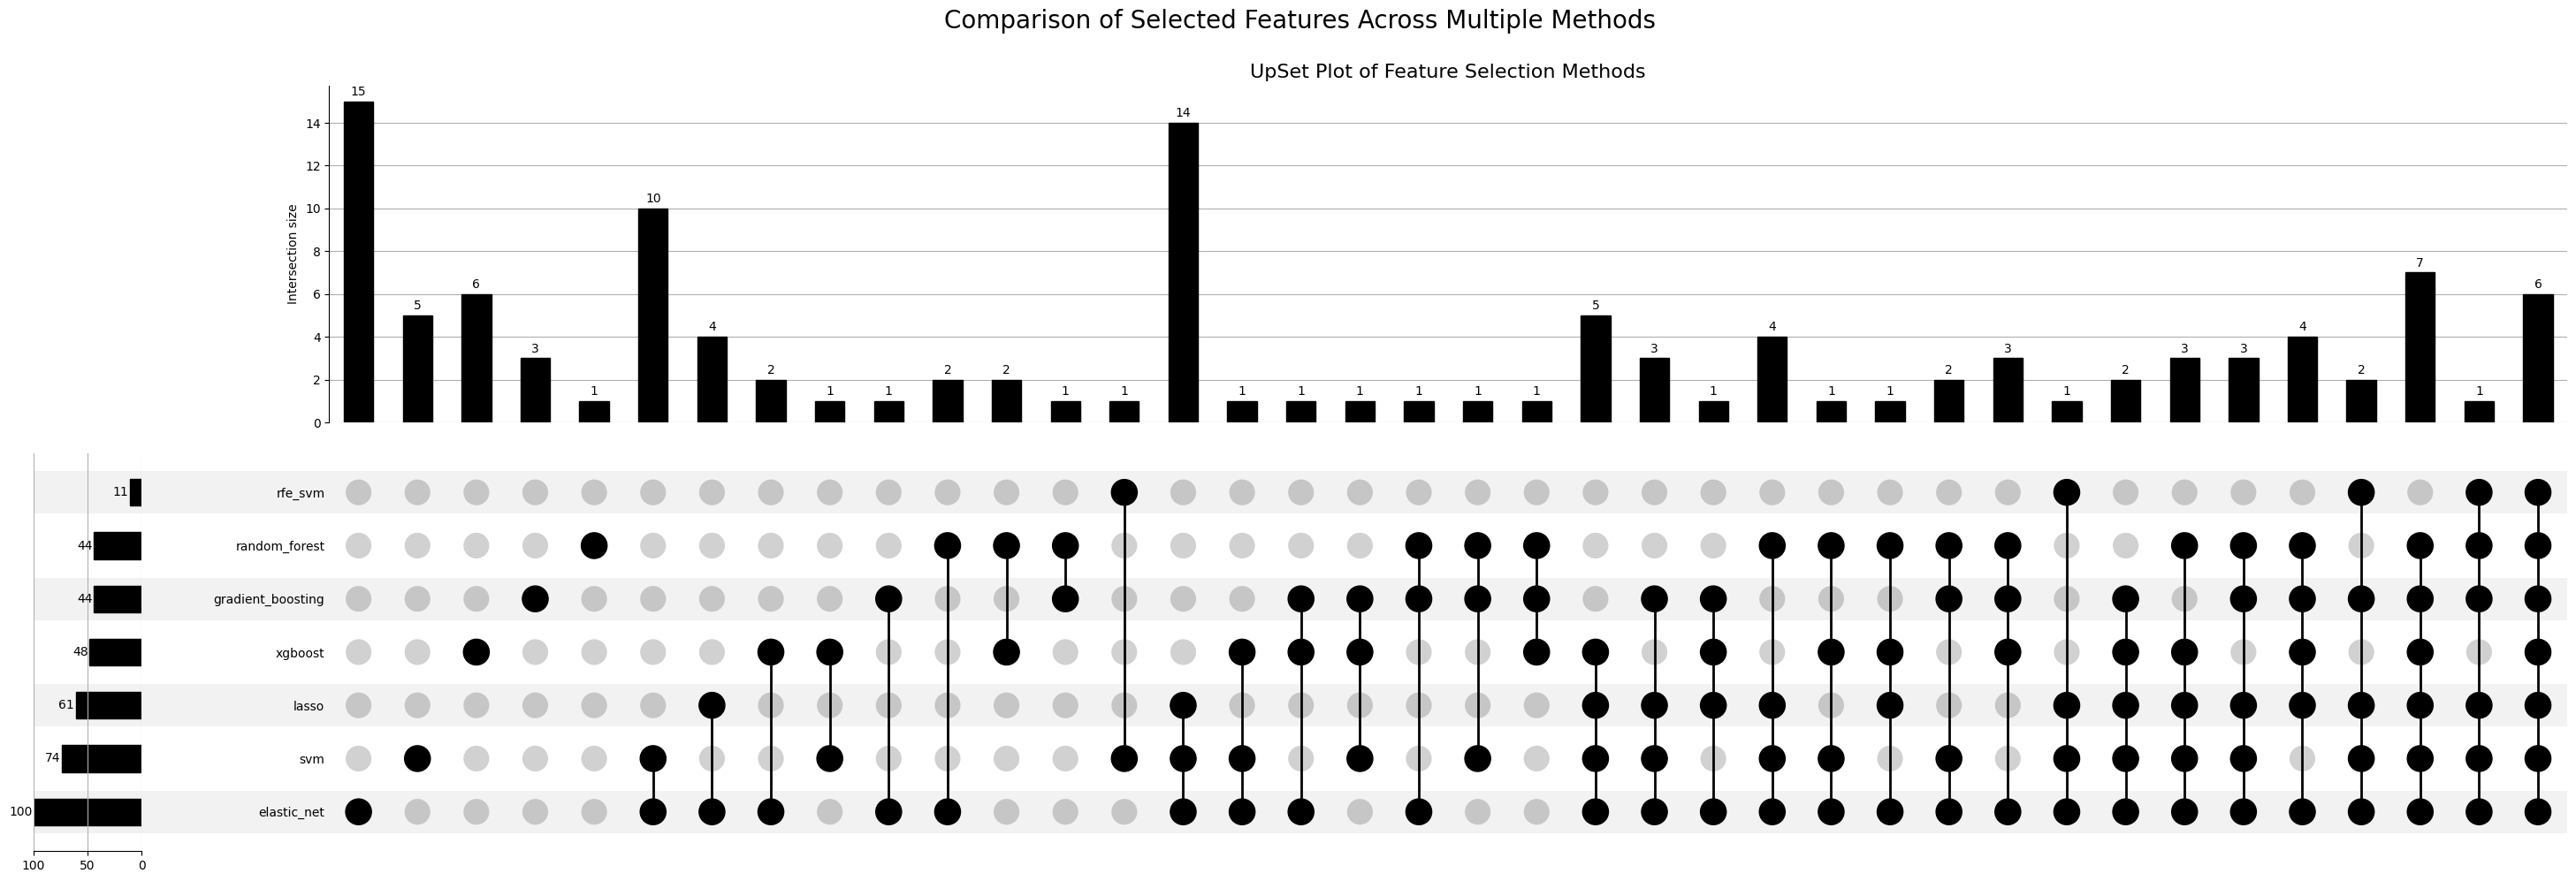

In [ ]:
# Create an UpSetPlot data structure
upset_data = from_contents(feature_sets)

# Generate an UpSetPlot
fig = plt.figure(figsize=(12, 12))  # You can adjust the size to fit your needs
upset_plot(upset_data, show_counts='%d', element_size=60)  # Adjust 'element_size' as needed

plt.title('UpSet Plot of Feature Selection Methods', fontsize=16)
plt.suptitle('Comparison of Selected Features Across Multiple Methods', fontsize=20)

# Adjust layout to avoid overlap
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()